## CartPole-v1

https://gym.openai.com/envs/CartPole-v1/  
CartPole-v0 defines "solving" as getting average reward of 195.0 over 100 consecutive trials. 

In [1]:
from dArwIn import Darwin

import gym
import numpy as np

In [2]:
env = gym.make('CartPole-v1')
obs = env.reset()
print(env.observation_space)
print(env.action_space)
print(obs)
del env

Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
Discrete(2)
[-0.0329848  -0.03242256  0.03406158 -0.02587028]


In [3]:
def eval_func(genom):
    env = gym.make('CartPole-v1')
    rewards = []
    for i in range(100):
        obs = env.reset()
        done = False
        reward = 0
        while not done:
            action = genom.predict(obs)
            obs, rew, done, _ = env.step(np.argmax(action))
            reward += rew
        rewards.append(reward)
    return np.mean(rewards)

In [4]:
cfg = {'max_genoms': 40,
       'output_activation': 'softmax',
       'activations': ['relu', 'sigmoid', 'tanh', 'leakyRelu'],
       'standard_hidden_node_activation': 'relu',
       'fitness_treshold': 500,
       'fitness_criterion': 'max',
       'n_inputs': 4,
       'n_outputs': 2,
       'survival_fraction': 1/3,
       'complexity_malus': 0.01,
       'max_stagnation': 10,
       'recurrent': False}

In [5]:
darwin = Darwin(cfg)

100%|██████████| 40/40 [00:04<00:00,  9.09it/s]

Generation: 0
Stagnation: 0
Best Genom ID: 35
Best Genom Shape: (1, 0)
Best Genom Complexity: 1.0
Best Genom Score: 205.553700
Time needed: 4.52s



/usr/local/lib/python3.8/dist-packages/dArwIn/Darwin.py:432: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


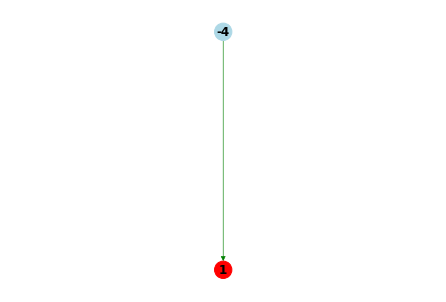

100%|██████████| 27/27 [00:06<00:00,  4.22it/s]

Generation: 1
Stagnation: 0
Best Genom ID: 31
Best Genom Shape: (2, 0)
Best Genom Complexity: 1.4142135623730951
Best Genom Score: 490.296692
Time needed: 6.48s


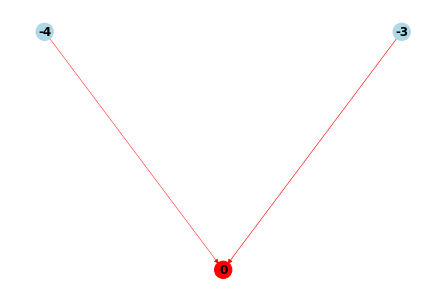

100%|██████████| 27/27 [00:06<00:00,  4.28it/s]

Generation: 2
Stagnation: 1
Best Genom ID: 31
Best Genom Shape: (2, 0)
Best Genom Complexity: 1.4142135623730951
Best Genom Score: 490.296692
Time needed: 6.39s


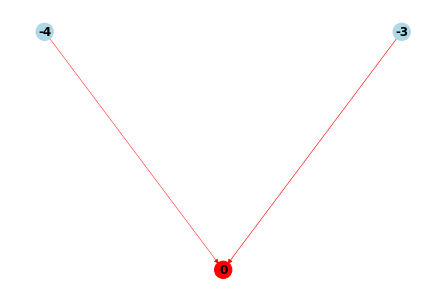

100%|██████████| 27/27 [00:08<00:00,  3.20it/s]

Generation: 3
Stagnation: 0
Best Genom ID: 24
Best Genom Shape: (2, 0)
Best Genom Complexity: 1.4142135623730951
Best Genom Score: 492.928932
Time needed: 8.50s
Solution found in Generation 3!


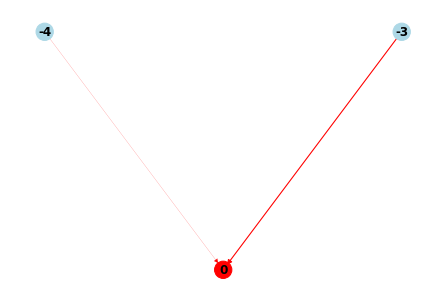

In [6]:
while not darwin.solutionFound and darwin.stagnation < cfg['max_stagnation']: 
    darwin.run(eval_func, runs=1, n_jobs=10, verbose=1)
    darwin.bestGenom.visualize()

In [7]:
darwin.solutionFound

True

In [8]:
darwin.bestGenom.fitness

492.9289321881345

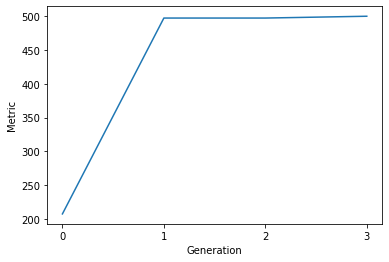

In [9]:
darwin.visualize()

/usr/local/lib/python3.8/dist-packages/dArwIn/Darwin.py:432: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


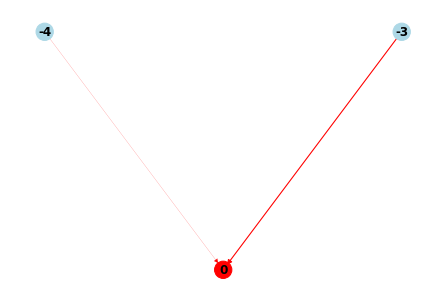

In [10]:
darwin.bestGenom.visualize()

In [11]:
darwin.bestGenom.describe()


Genom 24
Fitness: 492.9289
Shape: (2, 0)
Complexity: 1.4142135623730951

Connections: [[(-4, 0), -0.13542856924667857], [(-3, 0), -1.093485943443559]]

Input Nodes: [[-1, 'linear'], [-2, 'linear'], [-3, 'linear'], [-4, 'linear']]

Hidden Nodes: []

Output Nodes: [[0, 0.0, 'sigmoid'], [1, 0.0, 'sigmoid']]


In [12]:
env = gym.make('CartPole-v1')
obs = env.reset()
done = False
reward = 0
while not done:
    env.render()
    action = darwin.bestGenom.predict(obs)
    obs, rew, done, _ = env.step(np.argmax(action))
    reward += rew
env.close()
del env
print(reward)

500.0
